In [1]:
import librosa
import numpy as np
import librosa.display
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
south_audio_path = '/content/drive/MyDrive/sound/16000남쪽_cut.wav'

signal shape :  (400000,)


Text(0.5, 1.0, 'Waveform')

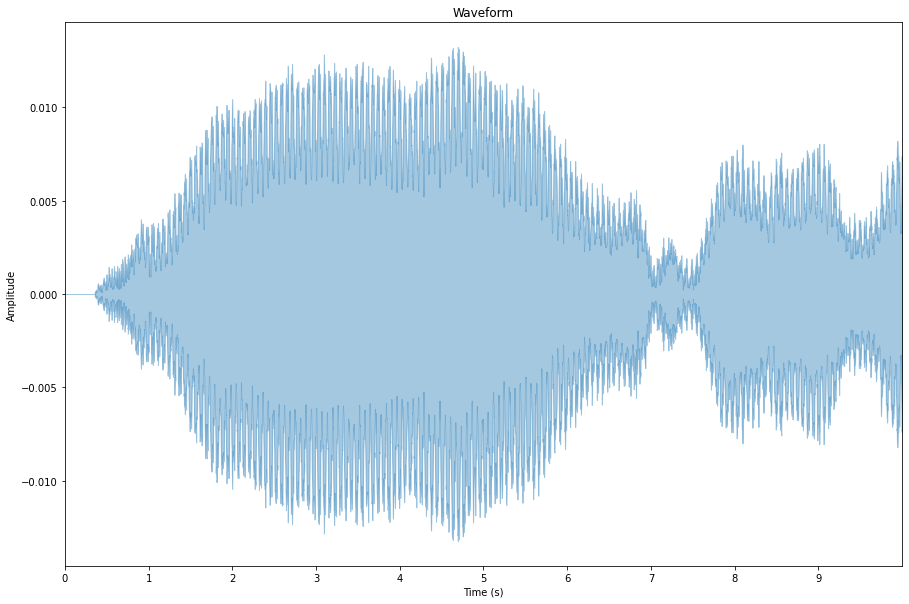

In [ ]:
# load audio file with Librosa

signal_South, sample_rate_South = librosa.load(south_audio_path, sr=40000)
print('signal shape : ', signal_South.shape)

# WAVEFORM
FIG_SIZE = (15, 10)
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(signal_South, sample_rate_South, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

In [ ]:
type(signal_South)

numpy.ndarray

signal shape :  (400000,)
signal_cut shape :  (320000,)


Text(0.5, 1.0, 'Waveform')

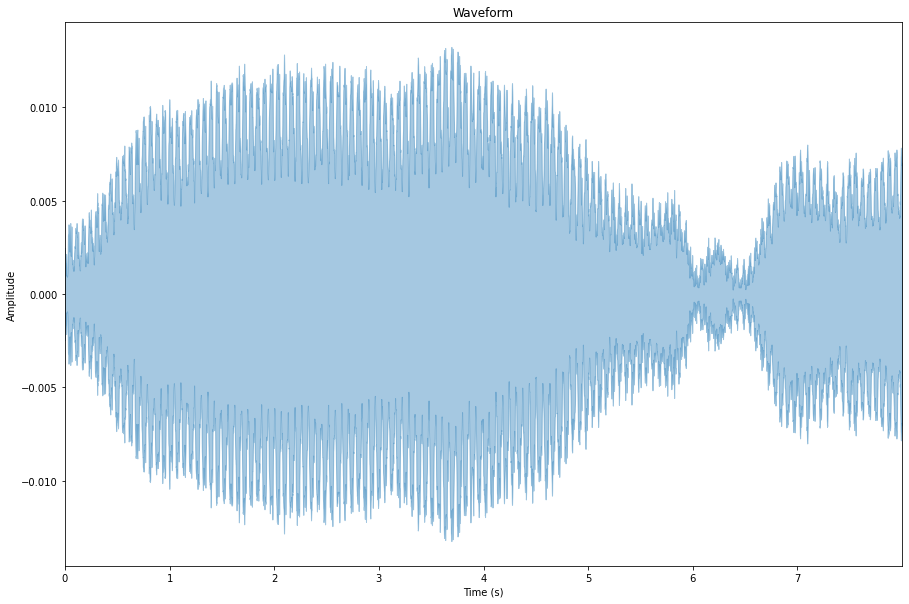

In [ ]:
signal_South, sample_rate_South = librosa.load(south_audio_path, sr=40000)
print('signal shape : ', signal_South.shape)
signal_South_cut = signal_South[40000:-40000]
print('signal_cut shape : ', signal_South_cut.shape)


# WAVEFORM
FIG_SIZE = (15, 10)
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(signal_South_cut, sample_rate_South, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

signal shape :  (400000,)


Text(0.5, 1.0, 'Waveform')

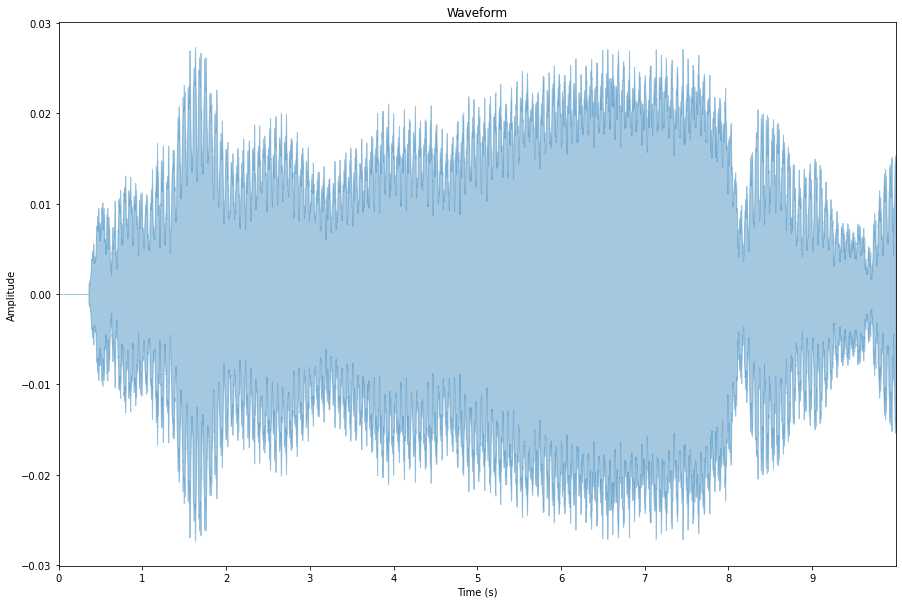

In [ ]:
FIG_SIZE = (15, 10)
north_audio_path = "/content/drive/MyDrive/sound/16000북쪽_cut.wav"

# load audio file with Librosa
signal_North, sample_rate_North = librosa.load(north_audio_path, sr=40000)
print('signal shape : ', signal_North.shape)

# WAVEFORM
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(signal_North, sample_rate_North, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

signal shape :  (400000,)


Text(0.5, 1.0, 'Waveform')

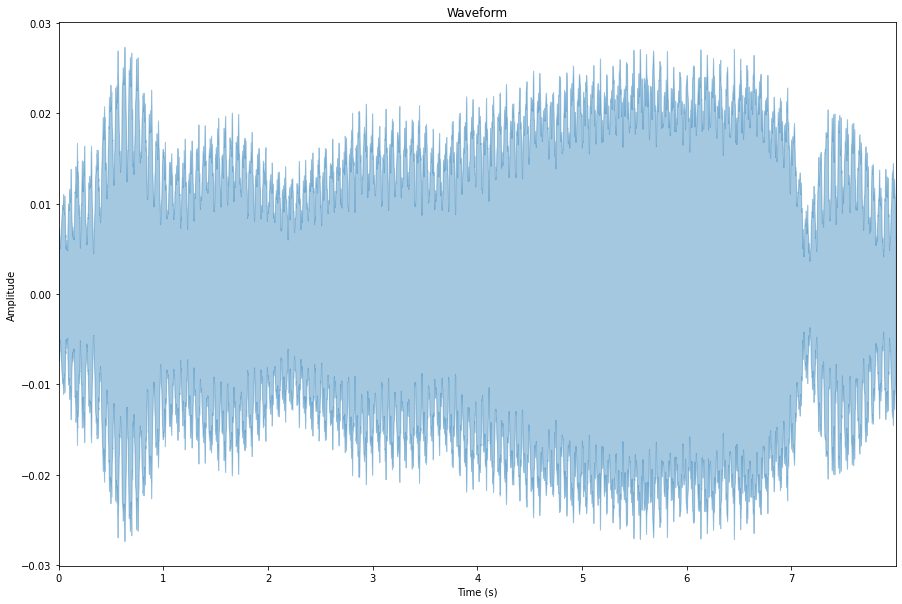

In [ ]:
FIG_SIZE = (15, 10)
north_audio_path = "/content/drive/MyDrive/sound/16000북쪽_cut.wav"

# load audio file with Librosa
signal_North, sample_rate_North = librosa.load(north_audio_path, sr=40000)
print('signal shape : ', signal_North.shape)
signal_North_cut = signal_North[40000:-40000]


# WAVEFORM
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(signal_North_cut, sample_rate_North, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

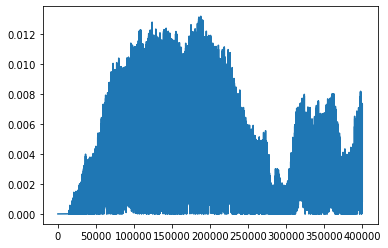

In [ ]:
abs_signal_South=abs(signal_South)
plt.plot(abs_signal_South)

In [ ]:
abs_signal_South

array([0.        , 0.        , 0.        , ..., 0.00643482, 0.0046124 ,
       0.00084811], dtype=float32)

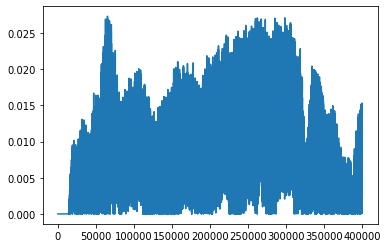

In [ ]:
abs_signal_North=abs(signal_North)
plt.plot(abs_signal_North)

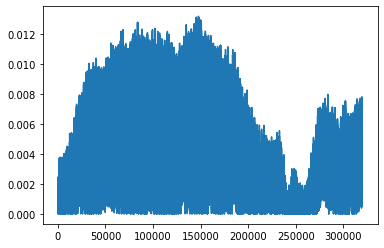

In [ ]:
abs_signal_South_cut=abs(signal_South_cut)
plt.plot(abs_signal_South_cut)

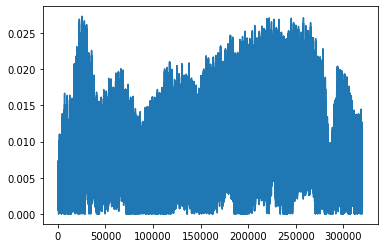

In [ ]:
abs_signal_North_cut=abs(signal_North_cut)
plt.plot(abs_signal_North_cut)

In [ ]:
np.mean(abs_signal_South)

0.0036677292

In [ ]:
np.mean(abs_signal_North)

0.008969223

In [ ]:
np.mean(abs_signal_South_cut)

0.004186823

In [ ]:
np.mean(abs_signal_North_cut)

0.010250319

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


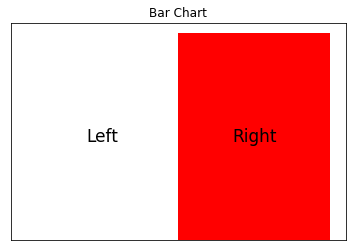

In [ ]:
if np.mean(abs_signal_North_cut) > np.mean(abs_signal_South_cut):
    x_label=['Left','Right']
    colors=['white','red']
    plt.bar(range(len(x_label)),[100, 100], width=1,color=colors)

    ax = plt.subplot()
    #ax.set_xticks([0, 1])
    #ax.set_xticklabels(x_label)

    #plt.annotate("Left", ha='center', va='center',size=14)
    #plt.annotate('Left', xy=(0,50), xytext=(0,0), fontsize=14, ha='center',va='center')


    plt.text(0, 50, 'Left', ha='center', va='center',fontsize=17)
    plt.text(1, 50, 'Right', ha='center', va='center',fontsize=17)


    ax.set_title("Bar Chart")
    #ax.axis('off')
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    plt.show()

else:
    x_label=['Left','Right']
    colors=['Red','White']
    plt.bar(range(len(x_label)),[100, 100], width=1,color=colors)

    ax = plt.subplot()
    #ax.set_xticks([0, 1])
    #ax.set_xticklabels(x_label)

    #plt.annotate("Left", ha='center', va='center',size=14)
    #plt.annotate('Left', xy=(0,50), xytext=(0,0), fontsize=14, ha='center',va='center')


    plt.text(0, 50, 'Left', ha='center', va='center',fontsize=17)
    plt.text(1, 50, 'Right', ha='center', va='center',fontsize=17)


    ax.set_title("Bar Chart")
    #ax.axis('off')
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    plt.show()

In [ ]:
pip install anvil-uplink

     |████████████████████████████████| 64 kB 3.8 MB/s 
     |████████████████████████████████| 51 kB 267 kB/s 
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45229 sha256=f42ccb0b5749b34efd39a5b2f92cf1d93a492e6bee8b18713a8fe930107448ed
  Stored in directory: /root/.cache/pip/wheels/29/ea/7d/3410aa0aa0e4402ead9a7a97ab2214804887e0f5c2b76f0c96
Successfully built ws4py


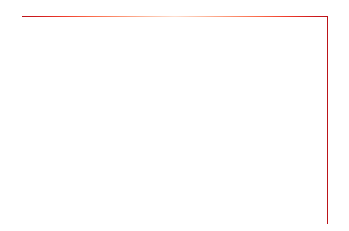

In [ ]:
import anvil.server

anvil.server.connect("FNPMT3RPHGO5IW7L775SKKTP-R5BEB4WZDXNRVTRS")

In [ ]:
import anvil.media
import anvil.mpl_util


@anvil.server.callable
def findsound_left (file):
       with anvil.media.TempFile(file) as filename:
        y, sr = librosa.load(filename, mono=False, sr=40000)
        abs_y=abs(y)
        abs_mean_value = np.mean(abs_y)
        left_value=abs_mean_value
        return abs_mean_value

@anvil.server.callable
def findsound_right(file):
      with anvil.media.TempFile(file) as filename:
        y, sr = librosa.load(filename, mono=False, sr=40000)
        abs_y=abs(y)
        abs_mean_value = np.mean(abs_y)
        right_value=abs_mean_value
        return abs_mean_value

@anvil.server.callable
def make_plot():
    x_label=['Left','Right']
    colors=['white','red']
    bar = plt.bar(range(len(x_label)),[100, 100], width=1,color=colors)

    ax = plt.subplot()
    plt.text(0, 50, 'Left', ha='center', va='center',fontsize=17, color='white')
    plt.text(1, 50, 'Right', ha='center', va='center',fontsize=17, color='White')
    plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
    plt.gca().spines['top'].set_visible(False) #위 테두리 제거
    plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
    plt.gca().spines['bottom'].set_visible(False) #아래쪽 테두리 제거

    #ax.set_title("Bar Chart")
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    cmap = plt.get_cmap('Reds') ## 그라데이션 색상

    def gradientbars(bars,cmap):
        '''
        막대기의 그라데이션을 적용시켜주는 함수
        '''
        grad = np.expand_dims(np.linspace(0,1,256),0) ## 그라데이션을 적용할 컬러 값
        ax = bars[0].axes ## 막대기가 그려진 axes를 가져온다. 이 axes위에 그라데이션을 그린다.
        lim = ax.get_xlim()+ax.get_ylim() ## 처음 바 차트가 그려진 x좌표와 y좌표를 저장
        a=0
        for bar in bars:
          if(a==0):
            a+=1
            continue
          bar.set_facecolor("none") ## 막대기의 색상을 비워준다.
          x,y = bar.get_xy() ## 막대기의 좌측 하단 x, y좌표
          w, h = bar.get_width(), bar.get_height() ## 막대기의 폭과 높이
          ax.imshow(grad, extent=[x,x+w,y+h,y], cmap = cmap, aspect="auto",vmin=-0.2, vmax=1.3) ## 막대기안에 그라데이션을 그려준다.
          ax.axis(lim) ## 처음에 그린 바차트의 x좌표 한계값과 y좌표 한계값을 적용한다.
    
    gradientbars(bar,cmap)

    plt.plot()
    return anvil.mpl_util.plot_image()


@anvil.server.callable
def make_plot2():
    x_label=['Left','Right']
    colors=['red','white']
    bar = plt.bar(range(len(x_label)),[100, 100], width=1,color=colors)

    ax = plt.subplot()
    plt.text(0, 50, 'Left', ha='center', va='center',fontsize=17, color='white')
    plt.text(1, 50, 'Right', ha='center', va='center',fontsize=17, color='White')
    plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
    plt.gca().spines['top'].set_visible(False) #위 테두리 제거
    plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
    plt.gca().spines['bottom'].set_visible(False) #아래쪽 테두리 제거

    #ax.set_title("Bar Chart")
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    cmap = plt.get_cmap('Reds') ## 그라데이션 색상

    def gradientbars(bars,cmap):
        '''
        막대기의 그라데이션을 적용시켜주는 함수
        '''
        grad = np.expand_dims(np.linspace(0,1,256),0) ## 그라데이션을 적용할 컬러 값
        ax = bars[0].axes ## 막대기가 그려진 axes를 가져온다. 이 axes위에 그라데이션을 그린다.
        lim = ax.get_xlim()+ax.get_ylim() ## 처음 바 차트가 그려진 x좌표와 y좌표를 저장
        a=0
        for bar in bars:
          if(a==1):
            #a+=1
            continue
          a+=1
          bar.set_facecolor("none") ## 막대기의 색상을 비워준다.
          x,y = bar.get_xy() ## 막대기의 좌측 하단 x, y좌표
          w, h = bar.get_width(), bar.get_height() ## 막대기의 폭과 높이
          ax.imshow(grad, extent=[x+w,x,y+h,y], cmap = cmap, aspect="auto",vmin=-0.2, vmax=1.3) ## 막대기안에 그라데이션을 그려준다.
          ax.axis(lim) ## 처음에 그린 바차트의 x좌표 한계값과 y좌표 한계값을 적용한다.
    
    gradientbars(bar,cmap)

    plt.plot()

    return anvil.mpl_util.plot_image()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


[]

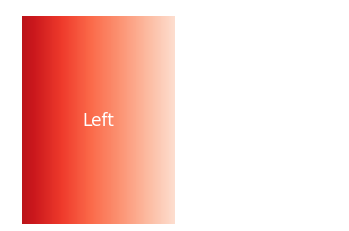

In [ ]:
    x_label=['Left','Right']
    colors=['red','white']
    bar = plt.bar(range(len(x_label)),[100, 100], width=1,color=colors)

    ax = plt.subplot()
    plt.text(0, 50, 'Left', ha='center', va='center',fontsize=17, color='white')
    plt.text(1, 50, 'Right', ha='center', va='center',fontsize=17, color='White')
    plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
    plt.gca().spines['top'].set_visible(False) #위 테두리 제거
    plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
    plt.gca().spines['bottom'].set_visible(False) #아래쪽 테두리 제거

    #ax.set_title("Bar Chart")
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    cmap = plt.get_cmap('Reds') ## 그라데이션 색상

    def gradientbars(bars,cmap):
        '''
        막대기의 그라데이션을 적용시켜주는 함수
        '''
        grad = np.expand_dims(np.linspace(0,1,256),0) ## 그라데이션을 적용할 컬러 값
        ax = bars[0].axes ## 막대기가 그려진 axes를 가져온다. 이 axes위에 그라데이션을 그린다.
        lim = ax.get_xlim()+ax.get_ylim() ## 처음 바 차트가 그려진 x좌표와 y좌표를 저장
        a=0
        for bar in bars:
          if(a==1):
            #a+=1
            continue
          a+=1
          bar.set_facecolor("none") ## 막대기의 색상을 비워준다.
          x,y = bar.get_xy() ## 막대기의 좌측 하단 x, y좌표
          w, h = bar.get_width(), bar.get_height() ## 막대기의 폭과 높이
          ax.imshow(grad, extent=[x+w,x,y+h,y], cmap = cmap, aspect="auto",vmin=-0.2, vmax=1.3) ## 막대기안에 그라데이션을 그려준다.
          ax.axis(lim) ## 처음에 그린 바차트의 x좌표 한계값과 y좌표 한계값을 적용한다.
    
    gradientbars(bar,cmap)

    plt.plot()

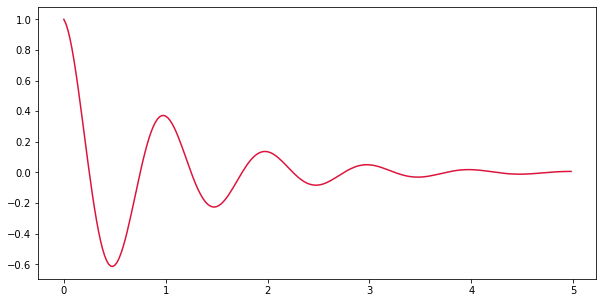

In [ ]:
    x = np.arange(0.0, 5.0, 0.02)
    y = np.exp(-x) * np.cos(2*np.pi*x)
      
      # Plot it in the normal Matplotlib way
    plt.figure(1, figsize=(10,5))
    plt.plot(x, y, 'crimson')  

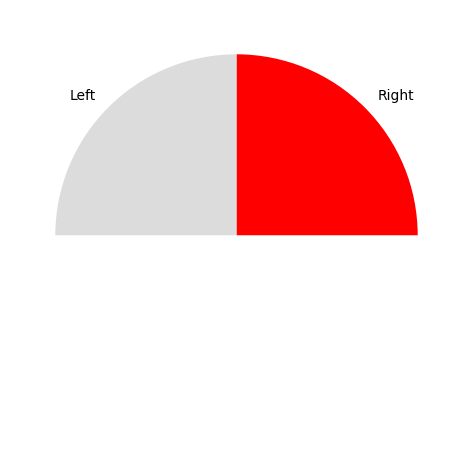

In [ ]:
label = ["Right", "Left"]
val = [1,1]

# append data and assign color
label.append("")
val.append(sum(val))  # 50% blank
colors = ['red', 'gainsboro', 'white']

# plot
fig = plt.figure(figsize=(8,6),dpi=100)
ax = fig.add_subplot(1,1,1)
ax.pie(val, labels=label, colors=colors)
#ax.add_artist(plt.Circle((0, 0), 0.6, color='white'))
fig.show()